In [37]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline


In [38]:
df = pd.read_csv('data/데이터.csv', encoding='euc-kr')
df.tail(10)

,Cstno,Age,Sex,Income,USE_Month,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
10117,712503408,57,M,6~8천만원미만,40,17925000,17498000,111
10118,713755458,50,M,6~8천만원미만,36,9959000,10310000,63
10119,716893683,55,F,Unknown,47,14657000,6009000,53
10120,710841183,54,M,4~6천만원미만,34,13940000,15577000,114
10121,713899383,56,F,2천만원미만,50,3688000,14596000,120
10122,772366833,50,M,2~4천만원미만,40,4003000,15476000,117
10123,710638233,41,M,2~4천만원미만,25,4277000,8764000,69
10124,716506083,44,F,2천만원미만,36,5409000,10291000,60
10125,717406983,30,M,2~4천만원미만,36,5281000,8395000,62
10126,714337233,43,F,2천만원미만,25,10388000,10294000,61


In [39]:
inform1_df = df[['Income', 'Total_Trans_Amt']]
inform1_df

,Income,Total_Trans_Amt
0,4~6천만원미만,1144000
1,2천만원미만,1291000
2,6~8천만원미만,1887000
3,2천만원미만,1171000
4,4~6천만원미만,816000
...,...,...
10122,2~4천만원미만,15476000
10123,2~4천만원미만,8764000
10124,2천만원미만,10291000
10125,2~4천만원미만,8395000


In [40]:
inform1_df['Use_Amt'] = ' '
inform1_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8136\700708660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inform1_df['Use_Amt'] = ' '


,Income,Total_Trans_Amt,Use_Amt
0,4~6천만원미만,1144000,
1,2천만원미만,1291000,
2,6~8천만원미만,1887000,
3,2천만원미만,1171000,
4,4~6천만원미만,816000,
...,...,...,...
10122,2~4천만원미만,15476000,
10123,2~4천만원미만,8764000,
10124,2천만원미만,10291000,
10125,2~4천만원미만,8395000,


In [41]:
for i in np.arange(len(df)):
    if inform1_df['Total_Trans_Amt'].values[i] < 1500000:
        inform1_df['Use_Amt'].values[i] = '150만원미만' 
    elif inform1_df['Total_Trans_Amt'].values[i] < 3000000:
        inform1_df['Use_Amt'].values[i] = '300만원미만'
    elif inform1_df['Total_Trans_Amt'].values[i] < 4500000:
        inform1_df['Use_Amt'].values[i] = '450만원미만'
    elif inform1_df['Total_Trans_Amt'].values[i] < 7000000:
        inform1_df['Use_Amt'].values[i] = '700만원미만'
#     elif inform_df['Total_Trans_Amt'].values[i] < 10000000:
#         inform_df['Range'].values[i] = 'E'
    else: inform1_df['Use_Amt'].values[i] = '700만원이상'
        

In [42]:
inform1_df

,Income,Total_Trans_Amt,Use_Amt
0,4~6천만원미만,1144000,150만원미만
1,2천만원미만,1291000,150만원미만
2,6~8천만원미만,1887000,300만원미만
3,2천만원미만,1171000,150만원미만
4,4~6천만원미만,816000,150만원미만
...,...,...,...
10122,2~4천만원미만,15476000,700만원이상
10123,2~4천만원미만,8764000,700만원이상
10124,2천만원미만,10291000,700만원이상
10125,2~4천만원미만,8395000,700만원이상


In [43]:
from functools import *

In [44]:
def count_columns(result_dic, element) :
    if result_dic.get(element) :
        result_dic[element] += 1
    else:
        result_dic[element] = 1

    return result_dic

def get_group_count(df_column) :
    return reduce(count_columns, df_column, dict())

In [45]:
result = get_group_count(inform1_df['Use_Amt'])
result

{'150만원미만': 1010,
 '300만원미만': 2885,
 '450만원미만': 2938,
 '700만원미만': 1869,
 '700만원이상': 1425}

In [64]:
result = get_group_count(inform1_df['Income'])
result

{'4~6천만원미만': 1402,
 '2천만원미만': 3561,
 '6~8천만원미만': 1535,
 '2~4천만원미만': 1790,
 '8천만원이상': 727,
 'Unknown': 1112}

In [47]:
idx = 0
inform1_df_columns = []

element = inform1_df['Use_Amt'][idx], inform1_df['Income']

inform1_df_columns.append(element)
inform1_df_columns

[('150만원미만',
  0        4~6천만원미만
  1          2천만원미만
  2        6~8천만원미만
  3          2천만원미만
  4        4~6천만원미만
             ...   
  10122    2~4천만원미만
  10123    2~4천만원미만
  10124      2천만원미만
  10125    2~4천만원미만
  10126      2천만원미만
  Name: Income, Length: 10127, dtype: object)]

In [14]:
inform1_df_columns = []

for idx in range(len(df)):
    element = inform1_df['Use_Amt'][idx], inform1_df['Income'][idx]
    inform1_df_columns.append(element)
    
len(inform1_df_columns)

10127

In [15]:
inform1_df_columns[:10]

[('150만원미만', '4~6천만원미만'),
 ('150만원미만', '2천만원미만'),
 ('300만원미만', '6~8천만원미만'),
 ('150만원미만', '2천만원미만'),
 ('150만원미만', '4~6천만원미만'),
 ('150만원미만', '2~4천만원미만'),
 ('150만원미만', '8천만원이상'),
 ('300만원미만', '4~6천만원미만'),
 ('150만원미만', '4~6천만원미만'),
 ('150만원미만', '6~8천만원미만')]

In [16]:
def get_group_count(inform1_df_columns) :
    
    print('len(inform1_df_columns) :', len(inform1_df_columns))
    
    def count_columns(result_dic, element_tuple) :
        element1, element2 = element_tuple
        # print(element1, ':', element2)

        if not (result_dic.get(element1)) :
            result_dic[element1] = {}
              
        if result_dic[element1].get(element2) :
            result_dic[element1][element2] += 1
        else :
            result_dic[element1][element2] = 1

        return result_dic
    
    result = reduce(count_columns, inform1_df_columns, dict())
    return result

In [17]:
result = get_group_count(inform1_df_columns)

len(inform1_df_columns) : 10127


In [18]:
result

{'150만원미만': {'4~6천만원미만': 173,
  '2천만원미만': 269,
  '2~4천만원미만': 175,
  '8천만원이상': 100,
  '6~8천만원미만': 209,
  'Unknown': 84},
 '300만원미만': {'6~8천만원미만': 457,
  '4~6천만원미만': 423,
  '2천만원미만': 972,
  '2~4천만원미만': 511,
  '8천만원이상': 217,
  'Unknown': 305},
 '450만원미만': {'2천만원미만': 1071,
  '6~8천만원미만': 422,
  '4~6천만원미만': 404,
  '2~4천만원미만': 511,
  'Unknown': 346,
  '8천만원이상': 184},
 '700만원미만': {'2~4천만원미만': 344,
  'Unknown': 266,
  '8천만원이상': 81,
  '6~8천만원미만': 154,
  '2천만원미만': 857,
  '4~6천만원미만': 167},
 '700만원이상': {'6~8천만원미만': 293,
  '2천만원미만': 392,
  '8천만원이상': 145,
  '2~4천만원미만': 249,
  '4~6천만원미만': 235,
  'Unknown': 111}}

In [19]:
dict_element = result['150만원미만']
dict_element

{'4~6천만원미만': 173,
 '2천만원미만': 269,
 '2~4천만원미만': 175,
 '8천만원이상': 100,
 '6~8천만원미만': 209,
 'Unknown': 84}

In [20]:
dict_values = [dict_element[key] for key in dict_element.keys()]
dict_values

[173, 269, 175, 100, 209, 84]

In [21]:
sum(dict_values)

1010

In [22]:
dict_element2 = result['300만원미만']
dict_element3 = result['450만원미만']
dict_element4 = result['700만원미만']
dict_element5 = result['700만원이상']
# dict_element6 = result['Unknown']


In [23]:
dict_values = [dict_element[key] for key in dict_element.keys()]
dict_values

[173, 269, 175, 100, 209, 84]

In [24]:
dict_values2 = [dict_element2[key] for key in dict_element2.keys()]
dict_values2

[457, 423, 972, 511, 217, 305]

In [25]:
dict_values3 = [dict_element3[key] for key in dict_element2.keys()]
dict_values4 = [dict_element4[key] for key in dict_element2.keys()]
dict_values5 = [dict_element5[key] for key in dict_element2.keys()]
# dict_values6 = [dict_element6[key] for key in dict_element2.keys()]

In [67]:
count_A = []
count_B = []
count_C = []
count_D = []
count_E = []
# count_F = []

for i in range(6):
#     idx = i+1
    count_A.append(dict_values[i])
    count_B.append(dict_values2[i])
    count_C.append(dict_values3[i])
    count_D.append(dict_values4[i])
    count_E.append(dict_values5[i])
#     count_F.append(dict_values6[i])

In [68]:
count_A, count_B, count_C, count_D, count_E#, count_F

([173, 269, 175, 100, 209, 84],
 [457, 423, 972, 511, 217, 305],
 [422, 404, 1071, 511, 184, 346],
 [154, 167, 857, 344, 81, 266],
 [293, 235, 392, 249, 145, 111])

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

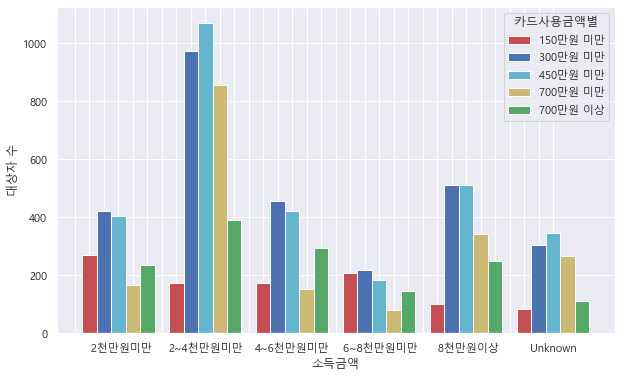

In [82]:
t1 = [14,2,8,26,20,32]
t2 = [15,3,9,27,21,33]
t3 = [16,4,10,28,22,34]
t4 = [17,5,11,29,23,35]
t5 = [18,6,12,30,24,36]

plt.bar(t1, count_A, color='r', width=1, label='150만원 미만')
plt.bar(t2, count_B, color='b', width=1, label='300만원 미만')
plt.bar(t3, count_C, color='c', width=1, label='450만원 미만')
plt.bar(t4, count_D, color='y', width=1, label='700만원 미만')
plt.bar(t5, count_E, color='g', width=1, label='700만원 이상')

plt.xlabel('소득금액')
plt.ylabel('대상자 수')
plt.legend(title='카드사용금액별')

t = list(range(1,35))
plt.xticks(t , ('','','         2천만원미만','','','','', '','','2~4천만원미만','','','','', '','4~6천만원미만','','','','','        6~8천만원미만','','','','', '','',' 8천만원이상','','','','','','Unknown'))   # set the locations of the xticks

plt.show()